###Install and import library


In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.7 MB/s eta 0:00:00


In [2]:
import time
import random
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
from IPython import display as ipythondisplay
from matplotlib.patches import Rectangle

###Function

Sarsa

In [3]:
def sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        exploration = random.uniform(0, 1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        reward_episode = 0.0
        done = False
        for step in range(num_steps_per_episode):
            next_state, reward, terminated, truncated, _ = env.step(action)
            exploration = random.uniform(0, 1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])
            reward_episode += reward
            state = next_state
            action = next_action
            if terminated or truncated:
                done = True
            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    print("Sum of Reward: {}".format(sum(rewards_all)))
    return q_table, rewards_all

Q-Learning

In [4]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    print("Sum of Reward : {}".format(sum(rewards_all)))
    return q_table, rewards_all

Play Function

In [5]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

Play Multiple Times Function

In [6]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

##Experiment


###FrozenLake-v1

In [7]:
gamma_1 = 0.99
learning_rate_1 = 0.1
max_epsilon_1 = 1.0
min_epsilon_1 = 0.01
epsilon_decay_rate_1 = 0.005

num_episodes_1 = 20000
num_steps_per_episode_1 = 100

In [8]:
env_1 = gym.make('FrozenLake-v1', render_mode="rgb_array")

Q-Learning

In [9]:
q_table_q_1 = np.zeros((env_1.observation_space.n, env_1.action_space.n))
print(q_table_q_1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [10]:
q_table_q_1, rewards_all_q_1 = q_learning(env_1, num_episodes_1, num_steps_per_episode_1, learning_rate_1, gamma_1, max_epsilon_1, min_epsilon_1, epsilon_decay_rate_1)

Episode 19999 finished
Sum of Reward : 12462.0


In [11]:
q_table_q_1

array([[4.64252382e-01, 4.50837277e-01, 4.47861116e-01, 4.51561151e-01],
       [3.24622836e-01, 2.47828300e-01, 2.02262913e-01, 3.92512657e-01],
       [3.08871830e-01, 2.30325191e-01, 2.26376321e-01, 3.11035859e-01],
       [8.95336744e-04, 2.03080843e-01, 2.62421631e-03, 6.21808457e-03],
       [4.79949973e-01, 3.87372044e-01, 3.90343631e-01, 3.69185878e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.49481933e-01, 9.84794614e-02, 2.43500756e-01, 6.58526539e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40444653e-01, 3.26251484e-01, 3.69545199e-01, 5.31088533e-01],
       [4.81157875e-01, 5.61984969e-01, 4.71486076e-01, 4.01624348e-01],
       [5.44841692e-01, 3.43982097e-01, 3.43630807e-01, 3.62254921e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.36496583e-01, 4.60213270e-01, 7.06061817e

In [12]:
print('Sum of rewards: ',sum(rewards_all_q_1))

Sum of rewards:  12462.0


In [13]:
play_multiple_times(env_1, q_table_q_1, 1000)

Number of successes: 722/1000
Average number of steps: 36.14127423822715


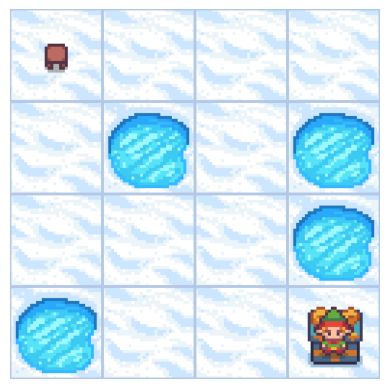

(1.0, 29)

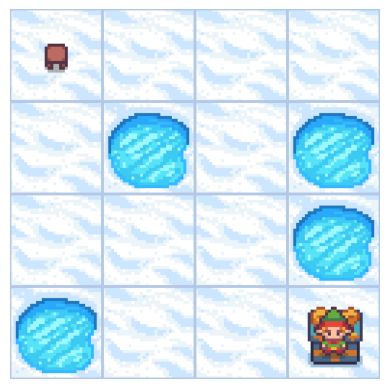

In [14]:
play(env_1, q_table_q_1, render=True)

In [15]:
window = 100
average_y_q_1 = []
for ind in range(len(rewards_all_q_1) - window + 1):
    average_y_q_1.append(np.mean(rewards_all_q_1[ind:ind+window]))

In [16]:
for ind in range(window - 1):
    average_y_q_1.insert(0, np.nan)

Sarsa

In [17]:
q_table_sarsa_1 = np.zeros((env_1.observation_space.n, env_1.action_space.n))
print(q_table_sarsa_1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [18]:
q_table_sarsa_1, rewards_all_sarsa_1 = sarsa_learning(env_1, num_episodes_1, num_steps_per_episode_1, learning_rate_1, gamma_1, max_epsilon_1, min_epsilon_1, epsilon_decay_rate_1)

Episode 19999 finished
Sum of Reward: 12447.0


In [19]:
q_table_sarsa_1

array([[0.49357454, 0.37504445, 0.42066107, 0.38063051],
       [0.09589535, 0.24675625, 0.11794751, 0.14805645],
       [0.24705784, 0.15269711, 0.13184241, 0.14448995],
       [0.14409885, 0.        , 0.        , 0.        ],
       [0.52446012, 0.41556873, 0.34241881, 0.28375646],
       [0.        , 0.        , 0.        , 0.        ],
       [0.22830093, 0.10131512, 0.08327798, 0.1067997 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.33509208, 0.41431826, 0.40220784, 0.54830642],
       [0.34718311, 0.58978427, 0.35248896, 0.4200097 ],
       [0.4614861 , 0.36602168, 0.33521406, 0.308056  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.36559597, 0.47845721, 0.68881979, 0.56474113],
       [0.73412339, 0.83993053, 0.71898715, 0.71208484],
       [0.        , 0.        , 0.        , 0.        ]])

In [20]:
print('Sum of rewards: ',sum(rewards_all_sarsa_1))

Sum of rewards:  12447.0


In [21]:
play_multiple_times(env_1, q_table_sarsa_1, 1000)

Number of successes: 685/1000
Average number of steps: 35.92700729927007


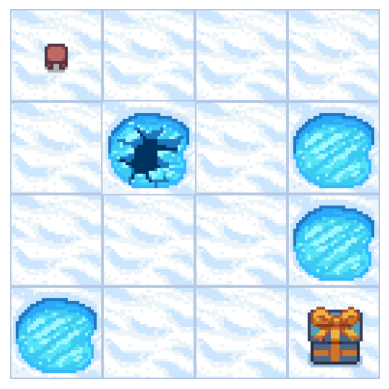

(0.0, 13)

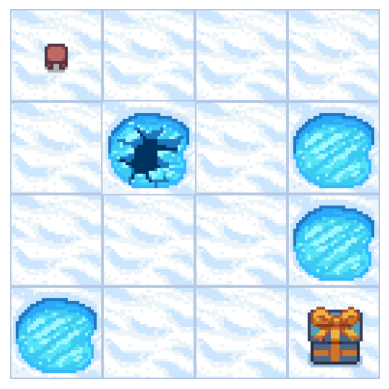

In [22]:
play(env_1, q_table_sarsa_1, render=True)

In [23]:
window = 100
average_y_sarsa_1 = []
for ind in range(len(rewards_all_sarsa_1) - window + 1):
    average_y_sarsa_1.append(np.mean(rewards_all_sarsa_1[ind:ind+window]))

In [24]:
for ind in range(window - 1):
    average_y_sarsa_1.insert(0, np.nan)

Comparision

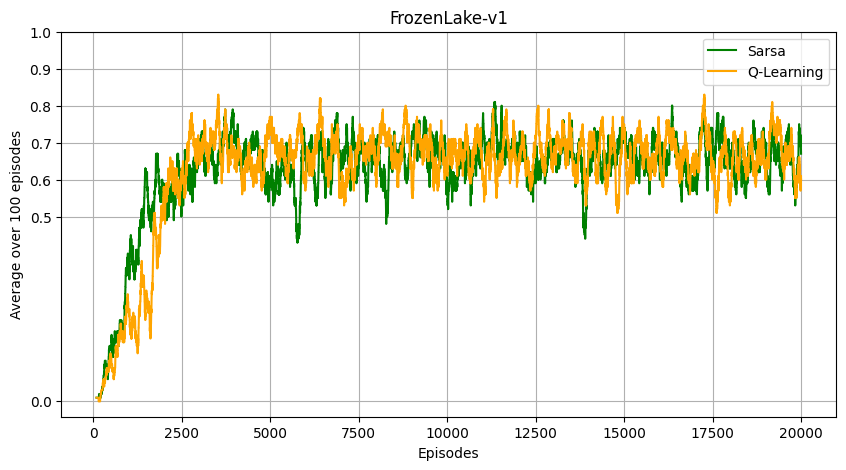

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_sarsa_1)), average_y_sarsa_1, color='green', label='Sarsa')
plt.plot(np.arange(len(rewards_all_q_1)), average_y_q_1, color='orange', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake-v1')
plt.legend()
plt.savefig('FrozenLake-v1.png')
plt.show()

###FrozenLake8x8-v1

In [26]:
gamma_2 = 0.9
learning_rate_2 = 0.1
max_epsilon_2 = 1.0
min_epsilon_2 = 0.001
epsilon_decay_rate_2 = 0.00005

num_episodes_2 = 300000
num_steps_per_episode_2 = 200

In [27]:
env_2 = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

Q-Learning

In [28]:
q_table_q_2 = np.zeros((env_2.observation_space.n, env_2.action_space.n))
print(q_table_q_2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [29]:
q_table_q_2, rewards_all_q_2 = q_learning(env_2, num_episodes_2, num_steps_per_episode_2, learning_rate_2, gamma_2, max_epsilon_2, min_epsilon_2, epsilon_decay_rate_2)

Episode 299999 finished
Sum of Reward : 156985.0


In [30]:
q_table_q_2

array([[4.22236762e-03, 4.05624829e-03, 4.17170448e-03, 6.80462241e-03],
       [4.78219359e-03, 4.90337984e-03, 9.23572556e-03, 4.91679690e-03],
       [7.32146795e-03, 7.42582215e-03, 1.39877105e-02, 7.37265208e-03],
       [1.12888720e-02, 1.08217026e-02, 1.64856167e-02, 1.17866566e-02],
       [1.61968325e-02, 1.68298574e-02, 2.12856458e-02, 1.61361601e-02],
       [2.01729700e-02, 2.13281034e-02, 2.81844888e-02, 2.16821463e-02],
       [2.55376114e-02, 2.46436062e-02, 3.29517838e-02, 2.52587114e-02],
       [2.54734781e-02, 3.63799352e-02, 2.92603664e-02, 2.69548107e-02],
       [3.72091836e-03, 3.69645272e-03, 3.51242886e-03, 5.88073524e-03],
       [4.35879446e-03, 4.40683276e-03, 6.80101726e-03, 4.34983467e-03],
       [6.28859773e-03, 6.01281424e-03, 1.00260137e-02, 6.81110513e-03],
       [7.15970042e-03, 7.31667472e-03, 6.57158711e-03, 1.52138170e-02],
       [1.53717422e-02, 1.58625120e-02, 2.36500236e-02, 1.51894991e-02],
       [2.35191696e-02, 2.29282724e-02, 3.03782760e

In [31]:
print('Sum of rewards: ',sum(rewards_all_q_2))

Sum of rewards:  156985.0


In [32]:
play_multiple_times(env_2, q_table_q_2, 1000)

Number of successes: 679/1000
Average number of steps: 72.50662739322533


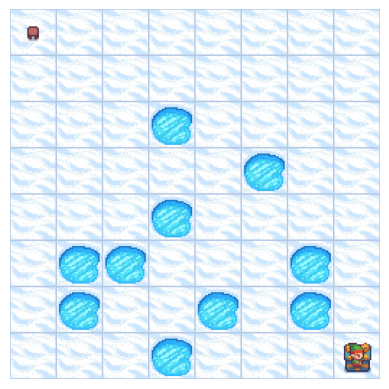

(1.0, 53)

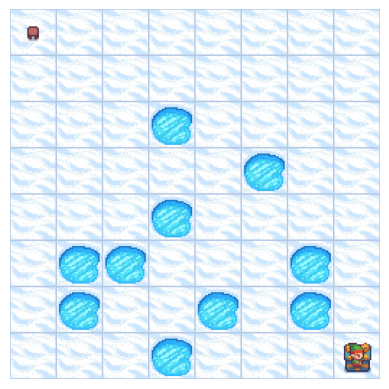

In [33]:
play(env_2, q_table_q_2, render=True)

In [34]:
window = 1000
average_y_q_2 = []
for ind in range(len(rewards_all_q_2) - window + 1):
    average_y_q_2.append(np.mean(rewards_all_q_2[ind:ind+window]))

In [35]:
for ind in range(window - 1):
    average_y_q_2.insert(0, np.nan)

Sarsa

In [36]:
q_table_sarsa_2 = np.zeros((env_2.observation_space.n, env_2.action_space.n))
print(q_table_sarsa_2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [37]:
q_table_sarsa_2, rewards_all_sarsa_2 = sarsa_learning(env_2, num_episodes_2, num_steps_per_episode_2, learning_rate_2, gamma_2, max_epsilon_2, min_epsilon_2, epsilon_decay_rate_2)

Episode 299999 finished
Sum of Reward: 157568.0


In [38]:
q_table_sarsa_2

array([[3.95207156e-03, 4.09265920e-03, 4.15774164e-03, 6.55137394e-03],
       [4.78137073e-03, 5.49717518e-03, 8.70056622e-03, 5.75823237e-03],
       [6.90266799e-03, 6.76244047e-03, 1.36465106e-02, 6.69281551e-03],
       [1.01150773e-02, 1.11594861e-02, 1.86091002e-02, 1.03541927e-02],
       [1.41449990e-02, 1.53883027e-02, 2.55818392e-02, 1.55590154e-02],
       [1.80570977e-02, 1.93917161e-02, 3.15846037e-02, 1.90095614e-02],
       [2.29225948e-02, 2.29438488e-02, 3.92924572e-02, 2.20924640e-02],
       [4.44810919e-02, 2.26766396e-02, 2.27007046e-02, 2.28211413e-02],
       [3.49101038e-03, 3.46919147e-03, 4.51927460e-03, 3.64517154e-03],
       [4.42205101e-03, 4.03585636e-03, 8.35376645e-03, 4.23024789e-03],
       [5.83630918e-03, 5.71330831e-03, 6.38819734e-03, 1.06352017e-02],
       [7.82767994e-03, 7.35260011e-03, 7.38838865e-03, 1.68023945e-02],
       [1.43680601e-02, 1.45900549e-02, 2.53566579e-02, 1.54387943e-02],
       [1.91945808e-02, 1.91329091e-02, 3.41565954e

In [39]:
print('Sum of rewards: ',sum(rewards_all_sarsa_2))

Sum of rewards:  157568.0


In [40]:
play_multiple_times(env_2, q_table_sarsa_2, 1000)

Number of successes: 682/1000
Average number of steps: 70.89296187683284


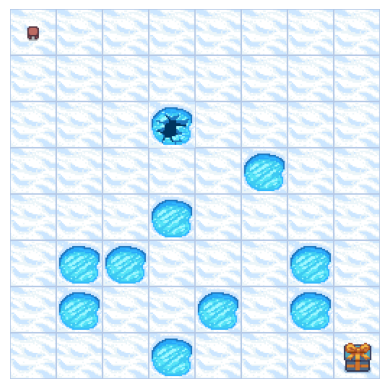

(0.0, 102)

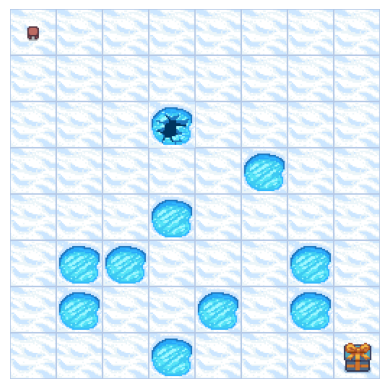

In [41]:
play(env_2, q_table_sarsa_2, render=True)

In [42]:
window = 1000
average_y_sarsa_2 = []
for ind in range(len(rewards_all_sarsa_2) - window + 1):
    average_y_sarsa_2.append(np.mean(rewards_all_sarsa_2[ind:ind+window]))

In [43]:
for ind in range(window - 1):
    average_y_sarsa_2.insert(0, np.nan)

Comparision

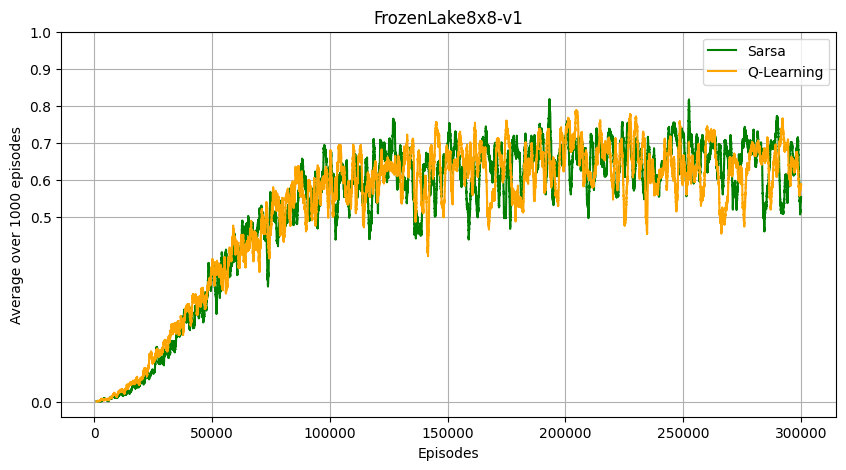

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_sarsa_2)), average_y_sarsa_2, color='green', label='Sarsa')
plt.plot(np.arange(len(rewards_all_q_2)), average_y_q_2, color='orange', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('FrozenLake8x8-v1')
plt.legend()
plt.savefig('FrozenLake8x8-v1.png')
plt.show()

###Taxi-v3


In [127]:
gamma_3 = 0.99
learning_rate_3 = 0.7
max_epsilon_3 = 1.0
min_epsilon_3 = 0.01
epsilon_decay_rate_3 = 0.01

num_episodes_3 = 10000
num_steps_per_episode_3 = 200

In [128]:
env_3 = gym.make('Taxi-v3', render_mode="rgb_array")

Q-Learning

In [129]:
q_table_q_3 = np.zeros((env_3.observation_space.n, env_3.action_space.n))
print(q_table_q_3)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [130]:
q_table_q_3, rewards_all_q_3 = q_learning(env_3, num_episodes_3, num_steps_per_episode_3, learning_rate_3, gamma_3, max_epsilon_3, min_epsilon_3, epsilon_decay_rate_3)

Episode 9999 finished
Sum of Reward : 11254.0


In [131]:
q_table_q_3

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  6.37843871,   4.59918636,  -2.94976586,   4.48290921,
          9.6220697 , -12.59241818],
       [ 11.41392156,  12.4775503 ,  10.45016624,  11.49901155,
         14.11880599,   2.80063231],
       ...,
       [ -3.4513418 ,  10.62960574,  -3.4513418 ,  -3.65807919,
         -5.30157403, -11.0880343 ],
       [ -4.32993459,  10.39602514,  -4.38085685,  -4.662707  ,
        -12.4284673 , -13.33073881],
       [ 17.60216164,  11.47654323,  16.02692   ,  18.8       ,
          8.21247041,   8.379476  ]])

In [132]:
print('Sum of rewards: ',sum(rewards_all_q_3))

Sum of rewards:  11254.0


In [133]:
play_multiple_times(env_3, q_table_q_3, 1000)

Number of successes: 1000/1000
Average number of steps: 13.006


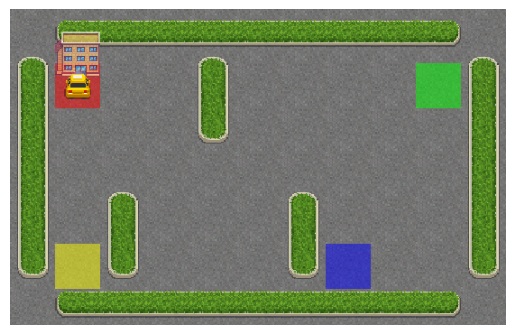

(9, 12)

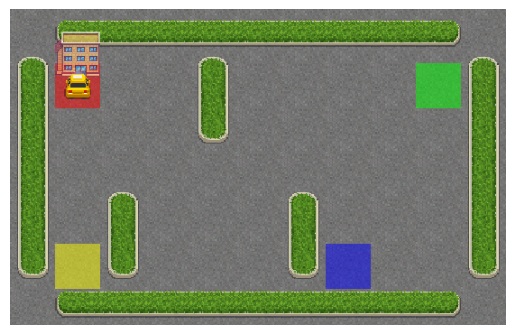

In [134]:
play(env_3, q_table_q_3, render=True)

In [135]:
window = 100
average_y_q_3 = []
for ind in range(len(rewards_all_q_3) - window + 1):
    average_y_q_3.append(np.mean(rewards_all_q_3[ind:ind+window]))

In [136]:
for ind in range(window - 1):
    average_y_q_3.insert(0, np.nan)

Sarsa

In [137]:
q_table_sarsa_3 = np.zeros((env_3.observation_space.n, env_3.action_space.n))
print(q_table_sarsa_3)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [138]:
q_table_sarsa_3, rewards_all_sarsa_3 = sarsa_learning(env_3, num_episodes_3, num_steps_per_episode_3, learning_rate_3, gamma_3, max_epsilon_3, min_epsilon_3, epsilon_decay_rate_3)

Episode 9999 finished
Sum of Reward: -45488.0


In [139]:
q_table_sarsa_3

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [-10.80948035,  -8.75811165,  -4.92179966, -12.44112806,
          9.6220697 , -13.6657911 ],
       [-20.1506194 ,  -4.76259396,   6.66707206, -14.59506634,
         14.11880592, -15.15363943],
       ...,
       [ -9.03667962,  -7.14414649,  -7.7350557 ,  -7.61054153,
        -16.60553206, -23.60094208],
       [-24.0479959 ,  -4.18941928, -19.95467019, -17.90666649,
        -22.07957795, -18.54015932],
       [  6.85146393,   8.7252875 ,   5.95445717,  18.8       ,
          4.07713499,  -9.5851    ]])

In [140]:
print('Sum of rewards: ',sum(rewards_all_sarsa_3))

Sum of rewards:  -45488.0


In [141]:
play_multiple_times(env_3, q_table_sarsa_3, 1000)

Number of successes: 917/1000
Average number of steps: 13.96619411123228


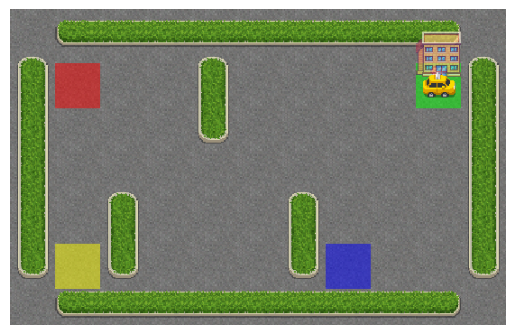

(9, 12)

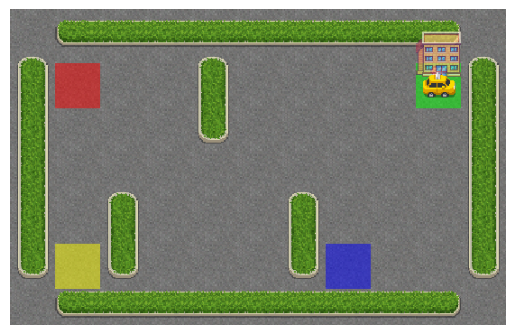

In [142]:
play(env_3, q_table_sarsa_3, render=True)

In [143]:
window = 100
average_y_sarsa_3 = []
for ind in range(len(rewards_all_sarsa_3) - window + 1):
    average_y_sarsa_3.append(np.mean(rewards_all_sarsa_3[ind:ind+window]))

In [144]:
for ind in range(window - 1):
    average_y_sarsa_3.insert(0, np.nan)

Comparision

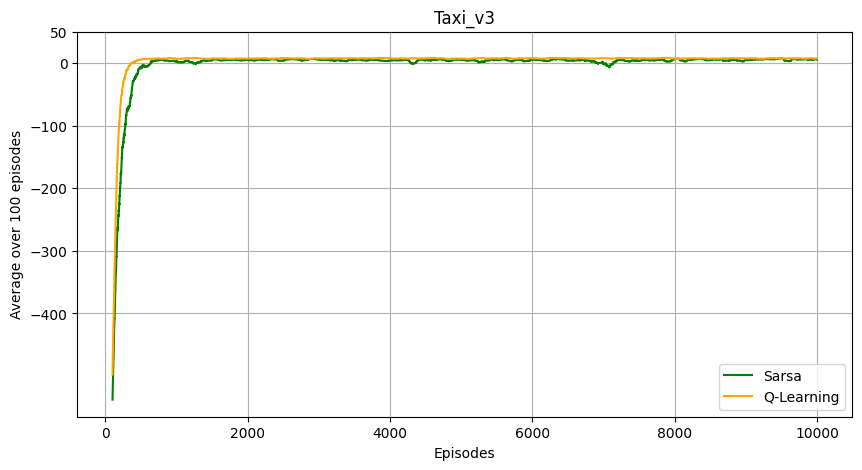

In [145]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_sarsa_3)), average_y_sarsa_3, color='green', label='Sarsa')
plt.plot(np.arange(len(rewards_all_q_3)), average_y_q_3, color='orange', label='Q-Learning')
plt.yticks([-400, -300, -200, -100, 0, 50])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.title('Taxi_v3')
plt.legend()
plt.savefig('Taxi-v3.png')
plt.show()

##Comment

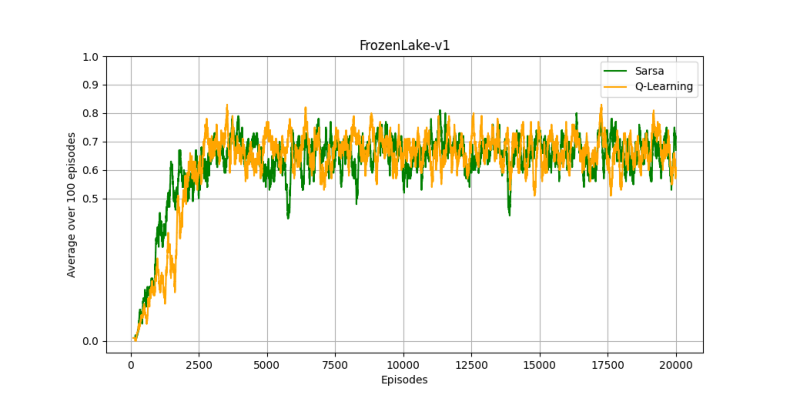

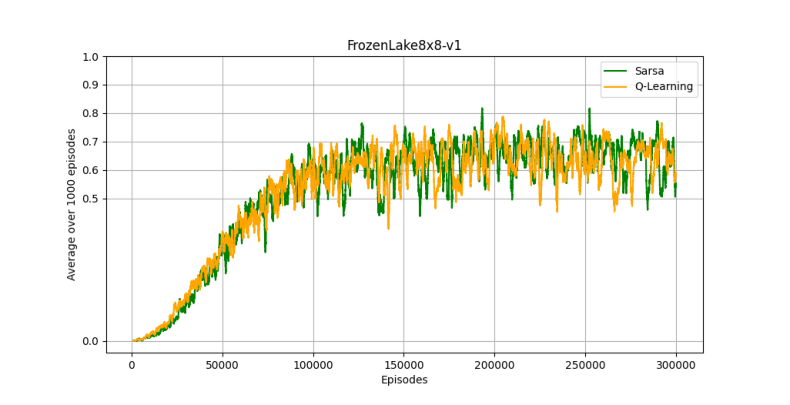

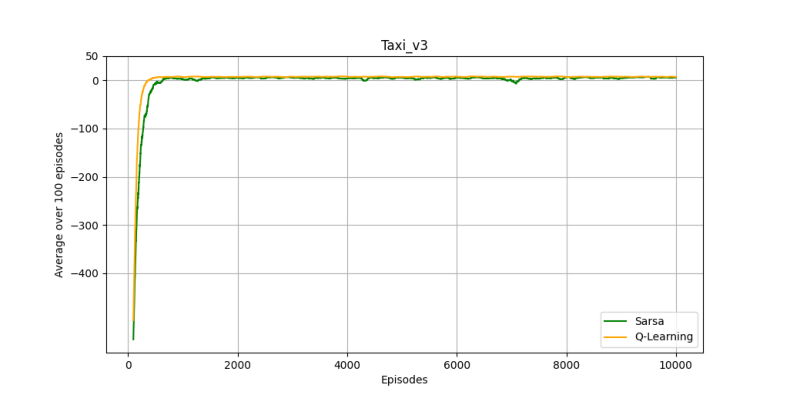

In [146]:
image_files = ['FrozenLake-v1.png', 'FrozenLake8x8-v1.png', 'Taxi-v3.png']
for i in range(0, 3):
  plt.figure(figsize=(10, 5))
  img = mpimg.imread(image_files[i])
  plt.imshow(img)
  plt.axis('off')
  plt.show()

Based on the three graphs, we can make the following observations:

* **Image 1 (FrozenLake-v1)**: In this graph, the two algorithms exhibit similar performance, with their lines closely intertwined and showing periodic fluctuations. Both lines demonstrate an initial steep learning curve, followed by a more stable performance with occasional dips and peaks. The overall trend suggests that both algorithms are capable of learning and achieving reasonable performance in this environment.

* **Image 2 (FrozenLake8x8-v1)**: Both algorithms perform similarly in this graph, with the lines closely following each other. The lines exhibit a consistent upward trend, indicating that both algorithms are learning and improving their performance over time. However, there are frequent fluctuations in the curves, suggesting that the learning process is not entirely smooth.

* **Image 3 (TaxiV3)**: In the more stable TaxiV3 environment, Q-Learning should optimize and converge faster than Sarsa. The reasons are:

 * In a deterministic (non-random) environment, Q-Learning can converge faster than Sarsa because it directly updates the Q-value function based on the optimal value rather than the next action as in Sarsa.

 * In this case, the Q-Learning line should show a more rapid and consistent improvement compared to Sarsa.